# Contraction Descriptors
In this section a short comparison of descriptros will be done. 
... Something on the S Matrix etc and the general Idea.


In [3]:
from os import listdir

import numpy as np
import matplotlib.pyplot as plt

from SCFInitialGuess.utilities.dataset import assemble_batch
from SCFInitialGuess.utilities.constants import number_of_basis_functions as N_BASIS
from SCFInitialGuess.utilities.usermessages import Messenger

Messenger.print_level = 1

%matplotlib inline

species = "H"
dim = N_BASIS[species]

def statistics(x, y):
    print(x.shape, y.shape)
    print("----------------------------------------")
    print(np.var(x, 0))
    print("----------------------------------------")
    print(np.var(y, 0))
    print("----------------------------------------")
    print(np.var(y, 0)/np.var(x, 0))

def analysis(x, y):
    """This function will analyize the created dataset by printing
    statistical values and plotting.
    """

    
    fig, axes = plt.subplots(x.shape[1], y.shape[1])
    
    for input_nr in range(x.shape[1]):
        for output_nr in range(y.shape[1]):
            axes[input_nr, output_nr].scatter(x[:, input_nr], y[:, output_nr])
    plt.show()

## Weighted sums
The following approaches all work with sums as the inner/outer contractions but vary as to how these vontractions are weighted. The inner sums are normalized w.r.t. the number of summands (= number of basis funcitons)

### No weights (i.e. all weights --> 1)

In [5]:
from SCFInitialGuess.nn.descriptors import WeightedSum as descriptor


x, y = assemble_batch("../dataset", species, descriptor)

[+] 2018-02-26 10:00:45: Assembling batch for: H
[+] 2018-02-26 10:02:31: Done assembling. Found 12533 points.


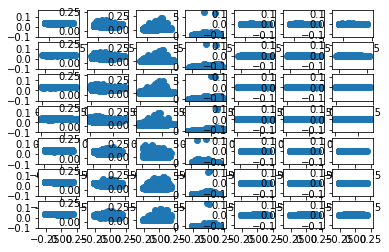

In [6]:
analysis(x, y)

### Weighting with electronegativity

In [7]:
from SCFInitialGuess.nn.descriptors import SumWithElectronegativities as descriptor

x, y = assemble_batch("../dataset", species, descriptor)

[+] 2018-02-26 10:04:30: Assembling batch for: H
[+] 2018-02-26 10:06:18: Done assembling. Found 12533 points.


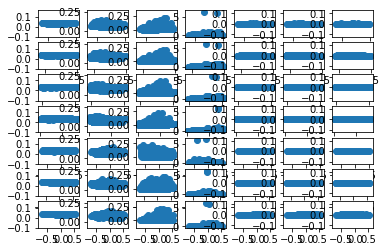

In [8]:
analysis(x, y)

The diagonal elements look relatively fine, but the others show definate bulking behaviour, implying that there is not a unique mapping.

### Weighting with atomic number
The sub contractions (sums) are weight with the atomic number Z.

In [9]:
from SCFInitialGuess.nn.descriptors import SumWithElectronegativities as descriptor


x, y = assemble_batch("../dataset", species, descriptor)

[+] 2018-02-26 10:15:01: Assembling batch for: H
[+] 2018-02-26 10:16:47: Done assembling. Found 12533 points.


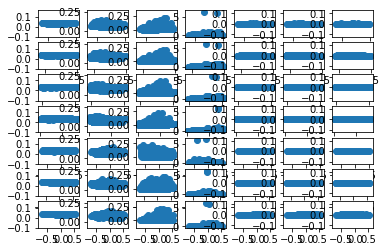

In [10]:
analysis(x, y)

### Number of valence
The number of valence.

In [11]:
from SCFInitialGuess.nn.descriptors import SumWithValenceElectrons as descriptor

x, y = assemble_batch("../dataset", species, descriptor)

[+] 2018-02-26 10:22:40: Assembling batch for: H
[+] 2018-02-26 10:24:28: Done assembling. Found 12533 points.


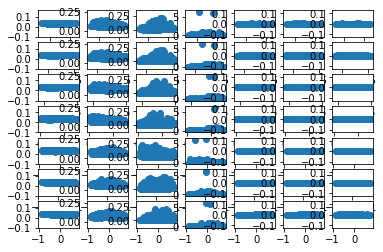

In [12]:
analysis(x, y)

## Combinations
In addition to a weighted sum, I will try to add some combinations of the inputs e.g. xi * xj

### Multiplication xi * xj

In [ ]:
from SCFInitialGuess.nn.descriptors import SumWithInputCombinations as descriptor

x, y = assemble_batch("../dataset", species, descriptor)

In [ ]:
analysis(x, y)